In [1]:
# This is a Case study focusing on finding correlations between gross revenue and other variables #

# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/evanshepherd/Downloads/movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Any Missing Data ?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 10)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 3%
gross - 0%
company - 0%
runtime - 0%


In [4]:
# What are the data types ?

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

df['votes'] = df['votes'].fillna(0).astype('int64')


In [6]:
 df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
# Reformatting 'released' column to extract year in following step.

df['format_released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25


In [10]:
# Creating correct year column

df['year_correct'] = df['format_released'].astype(str).str[:4]

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [12]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
pd.set_option('display.max_rows', None)

<AxesSubplot:>

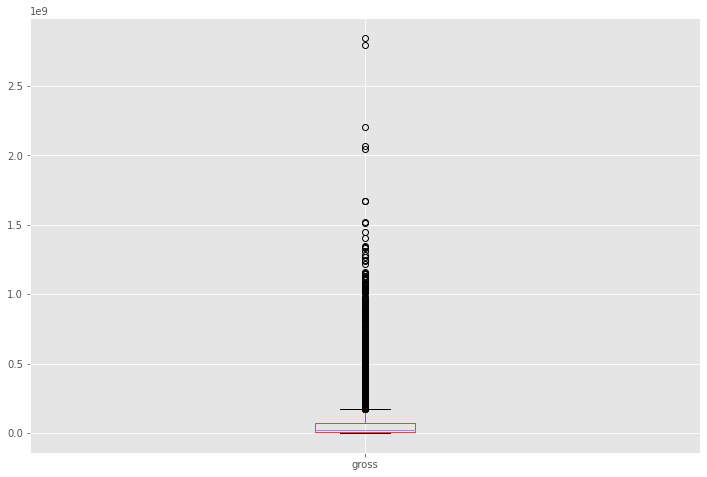

In [14]:
# Any Outliers?

df.boxplot(column=['gross'])

In [19]:
# Drop any duplicates

df_drop = df['company'].drop_duplicates().sort_values(ascending=False)

df_drop.head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

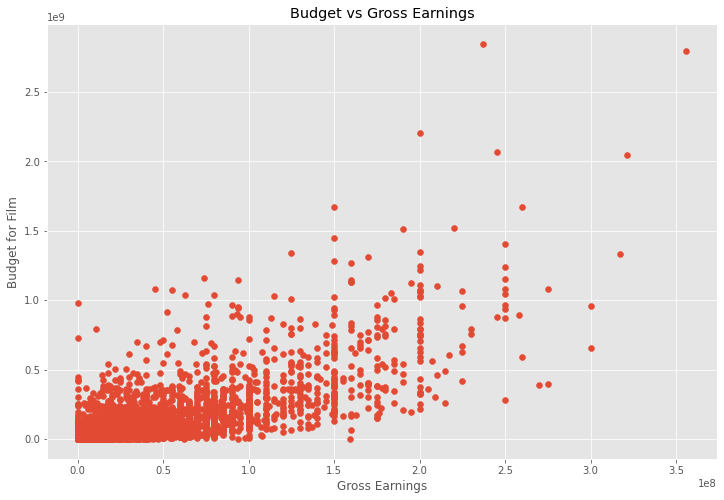

In [16]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

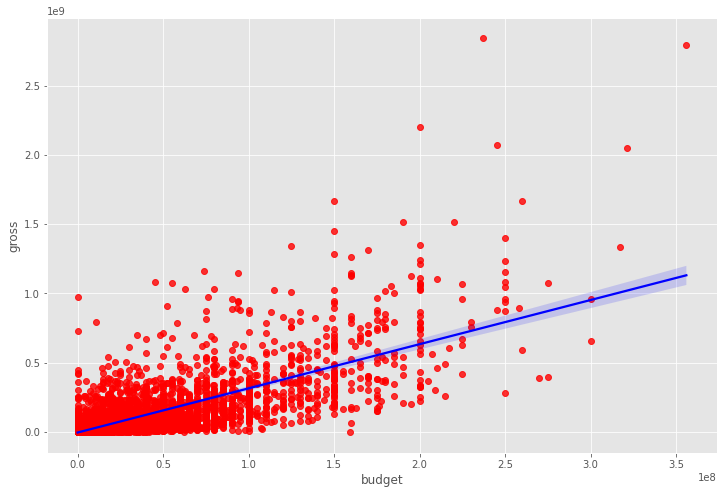

In [86]:
# Plot Budget vs Gross Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='rating', ylabel='gross'>

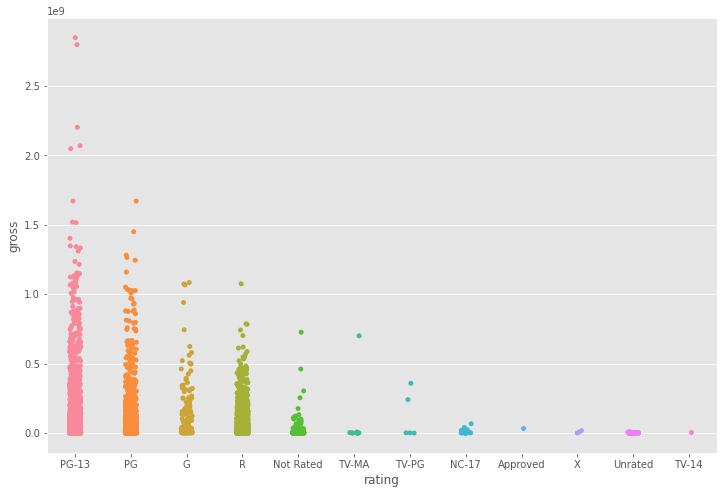

In [126]:
sns.stripplot(x="rating", y="gross", data=df)

In [96]:
# correlations

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [97]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.330410,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.330410,0.300115,1.000000,0.439883,0.560449,0.197948
budget,0.209304,-0.005194,0.439883,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560449,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.197948,0.176016,0.176912,1.000000


In [98]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.468107,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.468107,0.428138,1.000000,0.604693,0.752550,0.289726
budget,0.291152,-0.007500,0.604693,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752550,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.289726,0.246748,0.256783,1.000000


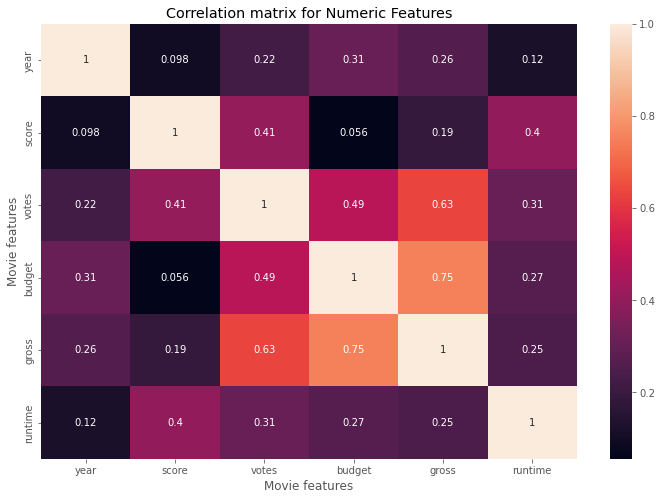

In [93]:
# Looking for coorelation between all numeric variables

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [99]:
# Finding correlation for categorical variables

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018


In [106]:
# Assinging random numeric values to each unique categorical variable.

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,year_correct
name,1.000000,0.344550,0.138378,0.253902,0.656265,0.107030,0.599053,0.720108,0.782931,0.653256,0.193868,0.111234,0.978147,0.686233,0.071782,0.525402,0.256424
rating,0.344550,1.000000,-0.014784,0.036004,0.263754,-0.069097,0.157689,0.284009,0.303196,0.303965,0.199683,0.083567,0.351587,0.334663,0.033730,0.174183,0.028958
genre,0.138378,-0.014784,1.000000,0.087977,0.090972,0.063222,0.146748,0.093459,0.088204,0.099715,-0.072434,0.101270,0.134001,0.057762,0.005585,0.101561,0.085155
year,0.253902,0.036004,0.087977,1.000000,0.315362,0.076737,0.328785,0.173233,0.212394,0.228035,-0.055861,0.060244,0.266957,0.123374,0.032916,0.386127,0.935420
released,0.656265,0.263754,0.090972,0.315362,1.000000,0.069419,0.452181,0.502078,0.546866,0.476487,0.163533,0.080338,0.669825,0.467310,0.046192,0.819616,0.331176
score,0.107030,-0.069097,0.063222,0.076737,0.069419,1.000000,0.230520,0.149655,0.103787,0.106947,-0.095521,0.001150,0.113338,0.037357,0.035609,0.104859,0.083827
votes,0.599053,0.157689,0.146748,0.328785,0.452181,0.230520,1.000000,0.497337,0.525260,0.456986,0.050495,0.042937,0.615089,0.394765,0.068738,0.426247,0.326933
director,0.720108,0.284009,0.093459,0.173233,0.502078,0.149655,0.497337,1.000000,0.696218,0.581045,0.195401,0.043336,0.737284,0.616887,0.080162,0.395940,0.175305
writer,0.782931,0.303196,0.088204,0.212394,0.546866,0.103787,0.525260,0.696218,1.000000,0.590601,0.198914,0.064078,0.797865,0.618767,0.057834,0.434875,0.209757
star,0.653256,0.303965,0.099715,0.228035,0.476487,0.106947,0.456986,0.581045,0.590601,1.000000,0.219987,0.066920,0.669962,0.573662,0.074116,0.381947,0.232548


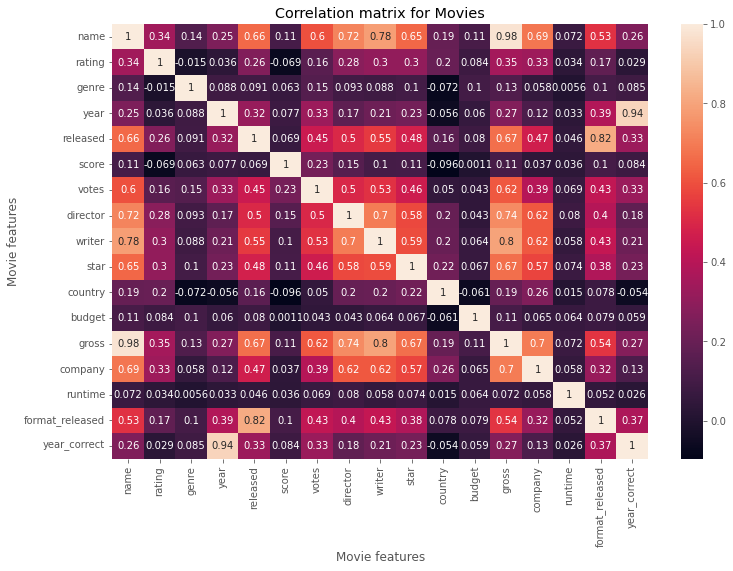

In [107]:
# Finding correlation between all variables


correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [110]:
# Correlations in table format

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name             name               1.000000
                 rating             0.344550
                 genre              0.138378
                 year               0.253902
                 released           0.656265
                 score              0.107030
                 votes              0.599053
                 director           0.720108
                 writer             0.782931
                 star               0.653256
                 country            0.193868
                 budget             0.111234
                 gross              0.978147
                 company            0.686233
                 runtime            0.071782
                 format_released    0.525402
                 year_correct       0.256424
rating           name               0.344550
                 rating             1.000000
                 genre             -0.014784
                 year               0.036004
                 released           0.263754
          

In [111]:
# sorting the values by correlation

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country          score             -0.095521
score            country           -0.095521
genre            country           -0.072434
country          genre             -0.072434
rating           score             -0.069097
score            rating            -0.069097
country          budget            -0.060811
budget           country           -0.060811
year             country           -0.055861
country          year              -0.055861
                 year_correct      -0.053951
year_correct     country           -0.053951
rating           genre             -0.014784
genre            rating            -0.014784
budget           score              0.001150
score            budget             0.001150
runtime          genre              0.005585
genre            runtime            0.005585
country          runtime            0.014856
runtime          country            0.014856
                 year_correct       0.026341
year_correct     runtime            0.026341
rating    

In [112]:
# Here are the strong correlations

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released         director           0.502078
director         released           0.502078
votes            writer             0.525260
writer           votes              0.525260
format_released  name               0.525402
name             format_released    0.525402
format_released  gross              0.537325
gross            format_released    0.537325
released         writer             0.546866
writer           released           0.546866
company          star               0.573662
star             company            0.573662
director         star               0.581045
star             director           0.581045
writer           star               0.590601
star             writer             0.590601
name             votes              0.599053
votes            name               0.599053
gross            votes              0.615089
votes            gross              0.615089
company          director           0.616887
director         company            0.616887
company   